# 데이터 분리

In [1]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()

In [2]:
from sklearn.model_selection import train_test_split

features = iris.data[:, 2:]
labels = iris.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=13)

In [4]:
X_train.shape, X_test.shape

((120, 2), (30, 2))

In [5]:
import numpy as np

np.unique(y_test, return_counts=True)

(array([0, 1, 2]), array([ 9,  8, 13], dtype=int64))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, stratify=labels, random_state=13)

In [7]:
X_train.shape, X_test.shape

((120, 2), (30, 2))

In [8]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2]), array([10, 10, 10], dtype=int64))

In [9]:
from sklearn.tree import DecisionTreeClassifier

iris_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
iris_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

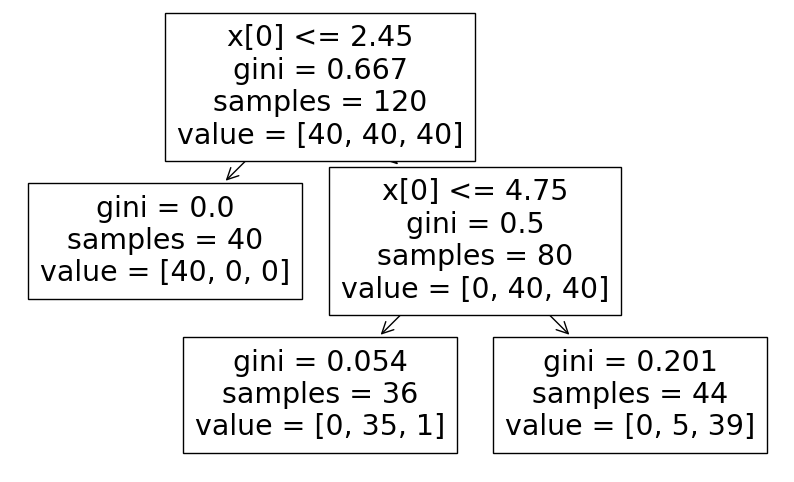

In [12]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# 위에서 만든 학습 모델의 Decision Tree 구조 확인
plt.figure(figsize=(10,6))
plot_tree(iris_tree);

In [13]:
from sklearn.metrics import accuracy_score

y_pred_tree = iris_tree.predict(iris.data[:, 2:])
accuracy_score(iris.target, y_pred_tree) #--> 정확도가 데이터를 나누기 전보다 감소하였다.

0.9533333333333334

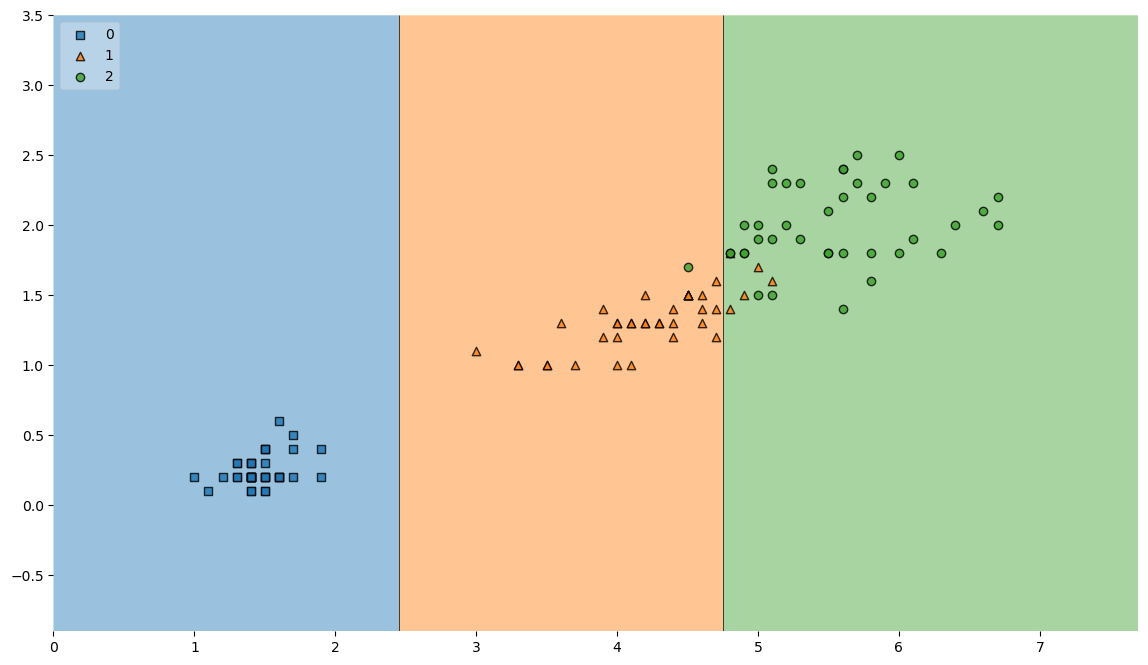

In [16]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(14,8))
plot_decision_regions(X=X_train, y=y_train, clf=iris_tree, legend=2)
plt.show()

In [17]:
y_pred_test = iris_tree.predict(X_test)
accuracy_score(y_test, y_pred_test) #--> 모델의 정확도보다 높으므로 과적합은 아니라고 말할 수 있다.

0.9666666666666667

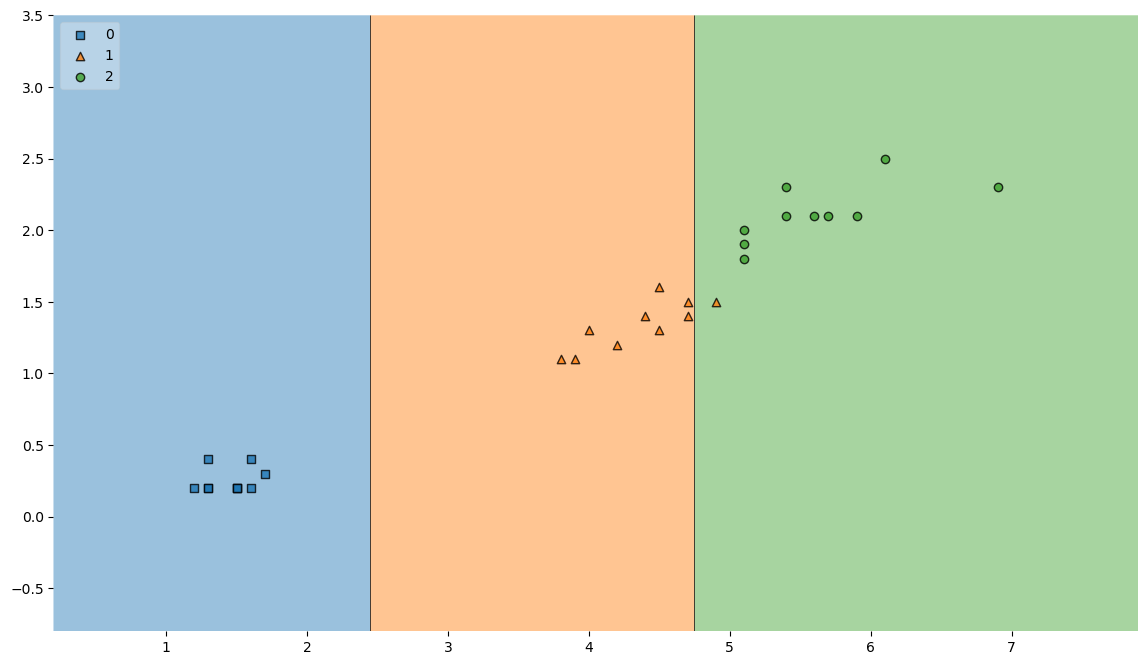

In [18]:
plt.figure(figsize=(14,8))
plot_decision_regions(X=X_test, y=y_test, clf=iris_tree, legend=2)
plt.show()

- 전체 데이터 중 테스트 데이터로 사용된 것들을 보여준다.

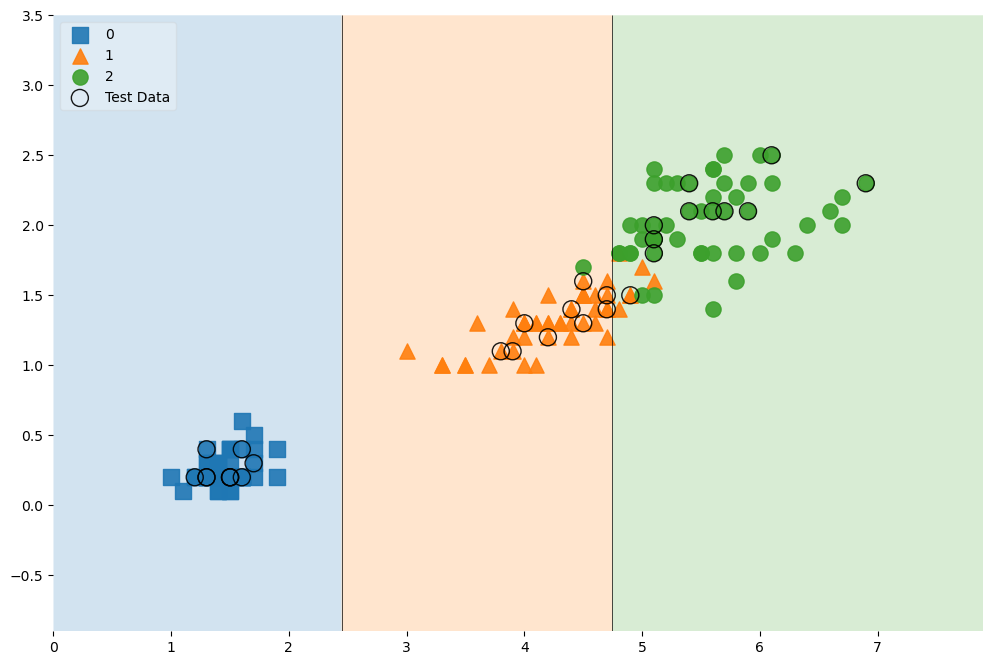

In [20]:
scatter_highlight_kwargs = {'s':150, 'label':'Test Data', 'alpha':0.9}
scatter_kwargs = {'s':120, 'edgecolor':None, 'alpha':0.9}

plt.figure(figsize=(12,8))
plot_decision_regions(
	X=features, y=labels, 
 	X_highlight=X_test, clf=iris_tree, legend=2,
	scatter_highlight_kwargs=scatter_highlight_kwargs,
	scatter_kwargs=scatter_kwargs,
	contourf_kwargs={'alpha':0.2}
)
plt.show()

In [21]:
features = iris.data
labels = iris.target

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, stratify=labels, random_state=13)

iris_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
iris_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

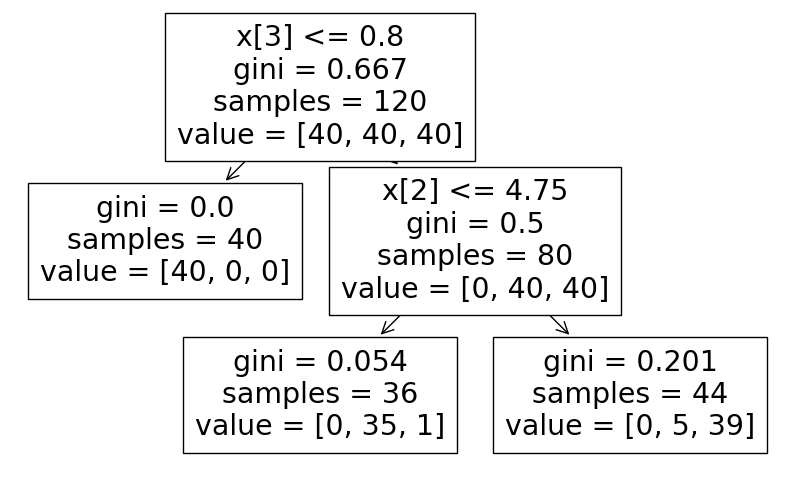

In [22]:
plt.figure(figsize=(10,6))
plot_tree(iris_tree);

In [25]:
np.array([4.3, 2.0, 1.2, 1.0]).shape

(4,)

In [29]:
np.array([[4.3, 2.0, 1.2, 1.0]]).shape #--> matrix 연산이 가능하도록 shape을 만들어 주기위해 대괄호를 2개 썼다.

(1, 4)

In [26]:
test_data = np.array([[4.3, 2.0, 1.2, 1.0]])
y_pred_data = iris_tree.predict(test_data)
y_pred_data

array([1])

In [28]:
iris.target_names[y_pred_data]

array(['versicolor'], dtype='<U10')

In [30]:
iris_tree.predict_proba(test_data) #--> 내가 훈련시킨 모델에 의해 도출되는 품종 예측 확률

array([[0.        , 0.97222222, 0.02777778]])

In [31]:
# max_depth=2인 모델에서 feature의 중요도

iris_tree.feature_importances_

array([0.        , 0.        , 0.42189781, 0.57810219])

In [33]:
# 만약 max_depth=5라면...
# depth가 커지면서 Split 분기에서 feature 'sepal width'도 사용되고 있음을 알 수 있다.

iris_tree = DecisionTreeClassifier(max_depth=5, random_state=13)
iris_tree.fit(X_train, y_train)

dict(zip(iris.feature_names, iris_tree.feature_importances_))

{'sepal length (cm)': 0.0,
 'sepal width (cm)': 0.033898305084745756,
 'petal length (cm)': 0.3958012326656394,
 'petal width (cm)': 0.5703004622496148}

In [34]:
list1 = ['a', 'b', 'c']
list2 = [1, 2, 3]

pairs = [pair for pair in zip(list1, list2)]
pairs

[('a', 1), ('b', 2), ('c', 3)]

In [38]:
zip(list1, list2)

In [36]:
dict(zip(list1, list2))

{'a': 1, 'b': 2, 'c': 3}

In [37]:
a, b = zip(*pairs)

print(a, list(a))
print(b, list(b))

('a', 'b', 'c') ['a', 'b', 'c']
(1, 2, 3) [1, 2, 3]
